# Fundamentos de Álgebra Lineal con Python

El Álgebra Lineal es la rama de las matemáticas que se encarga de estudiar las operaciones entre matrices y vectores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Tipos de valores

In [3]:
def describe(value):
    print(f"Su valor es:\n{value}")
    print(f"Su dimensión es: {value.ndim}")
    print(f"Su tamaño es: {value.size}")
    print(f"Su forma es: {value.shape}")

### Scalar

|0.5|
|-|

In [4]:
scalar = np.array(0.5)
describe(scalar)

Su valor es:
0.5
Su dimensión es: 0
Su tamaño es: 1
Su forma es: ()


### Vector

|1|2|3|4|
|-|-|-|-|

In [5]:
def plotVector(vect, cols, alpha = 1, lim=(-.5, .5)):
    plt.figure()
    
    for i in range(len(vect)):
        x = np.concatenate([[0, 0], vect[i]])
        
        plt.quiver(
            [x[0]],
            [x[1]],
            [x[2]],
            [x[3]],
            angles="xy", scale_units="xy", scale=1,
            color=cols[i],
            alpha=alpha
        )
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[0], lim[1])
        
    plt.grid()

In [6]:
def plotSpace(v1, v2, lim = (-100, 100)):
    for a in range(-10,10):
        for b in range(-10,10):
            plt.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                    marker = '.',
                    color = "orange")
            
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[0], lim[1])

    plt.grid()

Su valor es:
[1 2]
Su dimensión es: 1
Su tamaño es: 2
Su forma es: (2,)


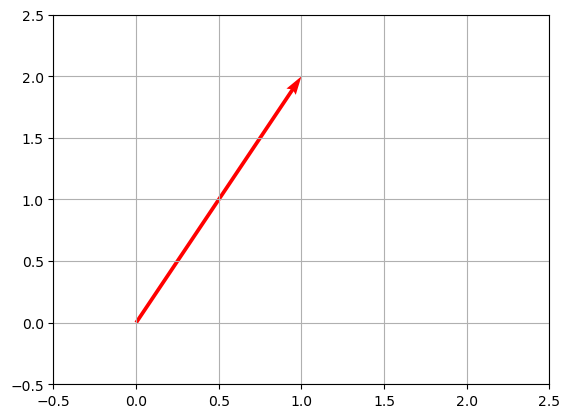

In [7]:
vector = np.array([1, 2])
describe(vector)
plotVector([vector], ["red"], lim=(-0.5, 2.5))

#### Independencia lineal

Supongamos: $Ax=b$

$$
\begin{bmatrix}
 v_1\\ 
 v_2
\end{bmatrix} \cdot
\begin{bmatrix}
 x_1\\ 
 x_2
\end{bmatrix} =
\begin{bmatrix}
 b_1\\ 
 b_2
\end{bmatrix}
$$

Dos vectores son independientes linealmente si no existe una combinación lineal (x) que nos dé b

In [8]:
v1 = np.array([1, 1])
v2 = np.array([-1, -1])

En este caso la ecuación sería:

$$
\begin{bmatrix}
 1\\ 
 1
\end{bmatrix} \cdot
\begin{bmatrix}
 x_1\\ 
 x_2
\end{bmatrix} =
\begin{bmatrix}
 -1\\ 
 -1
\end{bmatrix}
$$

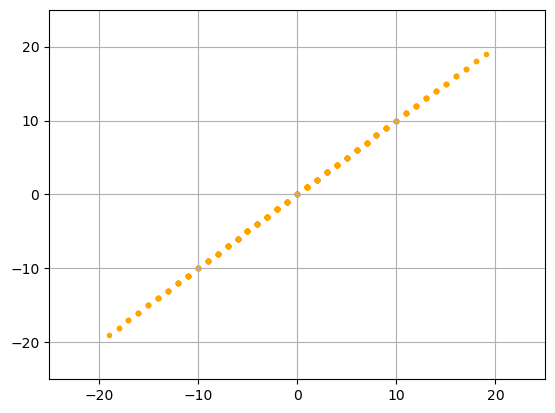

In [9]:
plotSpace(v1, v2, lim=(-25, 25))

In [10]:
v1 * -1 

array([-1, -1])

#### Vectores ortogonales

Un vector es ortogonal si el angulo que forma con otro es de 90°

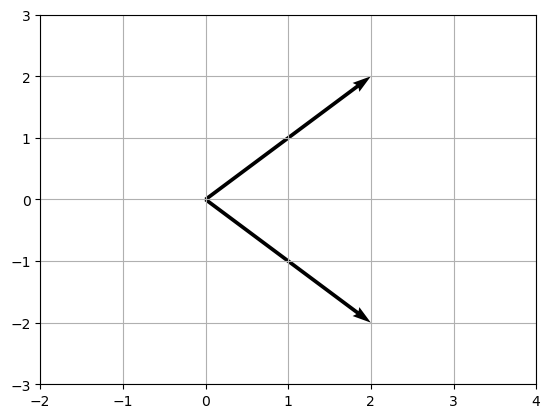

In [62]:
x = np.array([2, 2])
y = np.array([2, -2])


plt.quiver([0, 0],
          [0, 0],
          [x[0], y[0]],
          [x[1], y[1]],
           angles='xy', scale_units='xy', 
           scale=1,
          )
plt.xlim(-2,4)
plt.ylim(-3,3)

plt.grid()

In [71]:
x.dot(y) # Si nos muestra 0 es porque tienen 90 grados

0.0

##### Ortonormal

In [72]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

3.0
4.242640687119285


In [74]:
vector_ortonormal = v1 * (1/np.linalg.norm(v1))
np.linalg.norm(vector_ortonormal) # Nos devuelve 1.

1.0

### Matrix

|1|2|3|4|
|-|-|-|-|
|5|6|7|8|

In [11]:
matrix = np.array(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8]
    ]
)
describe(matrix)

Su valor es:
[[1 2 3 4]
 [5 6 7 8]]
Su dimensión es: 2
Su tamaño es: 8
Su forma es: (2, 4)


#### Identidad

Es el elemento neutro del producto interno

In [12]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Inversa 

Solo aplica para matrices cuadradas

$$A\cdot A^{-1}=I$$

Si no se cumple esto, es una matriz singular

In [14]:
A = np.random.randint(1, 3, (3,3))
print(A)

try:
    print("La inversa es")
    print(np.linalg.inv(
        A
    ))
except:
    print("A es singular")

[[1 2 2]
 [1 1 1]
 [1 2 1]]
La inversa es
[[-1.  2.  0.]
 [-0. -1.  1.]
 [ 1. -0. -1.]]


Para que haya solución en un sistema de ecuaciones, sus vectores debens ser linealmente independientes

In [15]:
A = np.array(
    [
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1],
    ]
)
A

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

Se ve que la tercer fila es linearmente dependiente ya que es la suma de la fila 1 y 2

En ese mismo razonamiento, las filas 1 y 2 tambien se puede decir que son dependientes

Por lo que esta matriz es singular

In [16]:
lambdas, V = np.linalg.eig(A.T)

A[lambdas == 0, :]

array([[0, 1, 1, 0]])

#### Singular

Son matrices que no tienen inversa

#### Diagonal

In [17]:
np.diag(np.arange(1, 6))

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [18]:
np.diag(np.arange(1, 6))[:3, :4]

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0]])

#### Simetrica

$$A=A^T$$

In [19]:
A = np.array([
    [1, 2, 3],
    [2, -1, 7],
    [3, 7, 11]
])
A == A.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

#### Ortonormal

Todas sus filas y columnas son mutuamente ortonormales

(Que sus normas sean igual a 1)

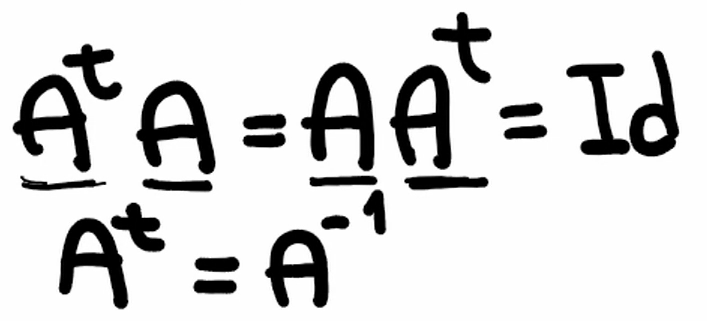

In [75]:
matrix = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
matrix

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [80]:
print(matrix[:, 0].dot(matrix[:, 1]))
print(matrix[:, 0].dot(matrix[:, 2]))
print(matrix[:, 1].dot(matrix[:, 2]))

0
0
0


In [79]:
print(np.linalg.norm(matrix[:, 0]))
print(np.linalg.norm(matrix[:, 1]))
print(np.linalg.norm(matrix[:, 2]))

1.0
1.0
1.0


In [81]:
print(matrix[0, :].dot(matrix[1, :]))
print(matrix[0, :].dot(matrix[2, :]))
print(matrix[1, :].dot(matrix[2, :]))

0
0
0


In [82]:
print(np.linalg.norm(matrix[0, :]))
print(np.linalg.norm(matrix[1, :]))
print(np.linalg.norm(matrix[2, :]))

1.0
1.0
1.0


In [115]:
var=np.linalg.norm(np.linalg.inv(matrix)-matrix.transpose())
e=0.00001 #valor aceptable
if var<e:
	print('Es ortogonal')
else:
	print('No es ortogonal')

No es ortogonal


### Tensor

(numero de matrices, numero_filas, número_columnas)

In [20]:
tensor = np.array([
[[255,255,0],[255,255,0],[255,255,0],[255,255,0]],
[[255,255,0],[255,255,0],[255,255,0],[255,255,0]],
[[0,0,205],[0,0,205],[0,0,205],[0,0,205]],
[[0,0,205],[0,0,205],[0,0,205],[0,0,205]],
[[255,0,0],[255,0,0],[255,0,0],[255,0,0]],
[[255,0,0],[255,0,0],[255,0,0],[255,0,0]],
])

describe(tensor)

Su valor es:
[[[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[  0   0 205]
  [  0   0 205]
  [  0   0 205]
  [  0   0 205]]

 [[  0   0 205]
  [  0   0 205]
  [  0   0 205]
  [  0   0 205]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]]
Su dimensión es: 3
Su tamaño es: 72
Su forma es: (6, 4, 3)


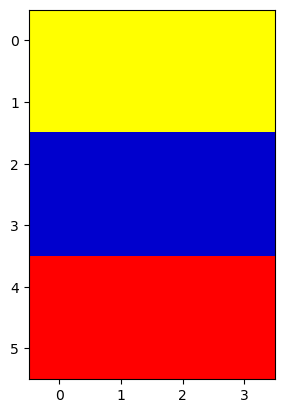

In [21]:
plt.imshow(tensor, interpolation="nearest")
plt.show()

## Operaciones

In [22]:
#inicializacion de arrays, uso Numpy solo para iniciarlizar
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([[6,5],[4,3],[2,1]])
c = np.array([[0,0],[0,0],[0,0]])

### Transpuesta

Es útil solo para matrices y tensores.

La transpuesta de una matriz $(n, m)$ da como resultado otra matriz de dimensión $(m, n)$

\begin{bmatrix}
 1 & 2 & 3\\ 
 4 & 5 & 6
\end{bmatrix} \rightarrow \begin{bmatrix}
1 & 4\\ 
2 & 5\\ 
3 & 6
\end{bmatrix}

In [23]:
describe(matrix.T)

Su valor es:
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
Su dimensión es: 2
Su tamaño es: 8
Su forma es: (4, 2)


Su valor es:
[[[255 255   0   0 255 255]
  [255 255   0   0 255 255]
  [255 255   0   0 255 255]
  [255 255   0   0 255 255]]

 [[255 255   0   0   0   0]
  [255 255   0   0   0   0]
  [255 255   0   0   0   0]
  [255 255   0   0   0   0]]

 [[  0   0 205 205   0   0]
  [  0   0 205 205   0   0]
  [  0   0 205 205   0   0]
  [  0   0 205 205   0   0]]]
Su dimensión es: 3
Su tamaño es: 72
Su forma es: (3, 4, 6)


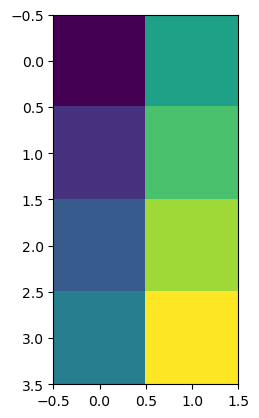

In [24]:
describe(tensor.T)
plt.imshow(matrix.T)

### Suma

La suma de dos matrices es una matriz de la misma dimensión.
$$
\begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 6
\end{bmatrix} + \begin{bmatrix}
4 & 5 & 6 \\ 
1 & 2 & 3
\end{bmatrix} = \begin{bmatrix}
5 & 7 & 9\\ 
5 & 7 & 9
\end{bmatrix}$$

Si a una matriz se le suma un escalar, a cada componente se le aplica la suma.
$$
\begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 6
\end{bmatrix} + 3 = 
\begin{bmatrix}
4 & 5 & 6\\ 
7 & 8 & 9
\end{bmatrix}$$

Si a una matriz se le suma un vector, el vector debe tener una logitud de $m$, a cada fila de la matriz se le suma el vector.

$$
\begin{bmatrix}
4 & 5 & 6 \\ 
1 & 2 & 3
\end{bmatrix} + \begin{bmatrix}
9 & 6 & 3
\end{bmatrix} = 
\begin{bmatrix}
13 & 11 & 9\\ 
10 & 8 & 6
\end{bmatrix}
$$

In [25]:
A = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

B = np.array(
    [
        [4, 5, 6],
        [1, 2, 3]
    ]
)

C = np.array([9, 6, 3])

In [26]:
A + B

array([[5, 7, 9],
       [5, 7, 9]])

In [27]:
A + 3

array([[4, 5, 6],
       [7, 8, 9]])

In [28]:
B + C

array([[13, 11,  9],
       [10,  8,  6]])

### Producto interno

![](https://static.platzi.com/media/user_upload/1-bc75dc14-7def-4dfc-aea7-e6f5d36e512f.jpg)

Entre dos matrices: 

Sea A una matriz (mxn) y B una matriz (pxq)

C = A·B está definido si n = p y C es una matriz (mxq)

#### Propiedades

- Asoviativa

$$A\cdot (B\cdot C)=(A\cdot B)\cdot C$$

- Distributiva

$$A\cdot (B+C)=(A\cdot B)+(A\cdot C)$$

- Conmutativa SOLO en vectores

$$B\cdot C = C\cdot B$$

- $$(AB)^T=B^TA^T$$
  
- $$(AB)^{T^T}=AB$$

In [29]:
A * B

array([[ 4, 10, 18],
       [ 4, 10, 18]])

### Combinación lineal

In [30]:
v1 = np.array([2, 5])
v2 = np.array([3, 2])

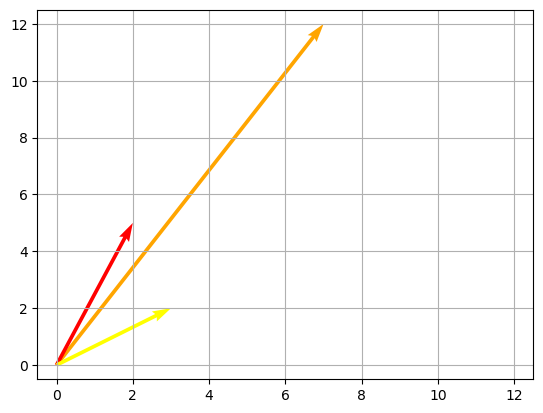

In [31]:
v1v2 = 2*v1 + v2
plotVector([v1v2, v1, v2], ["orange", "red", "yellow"],
           lim=(-0.5, 12.5))

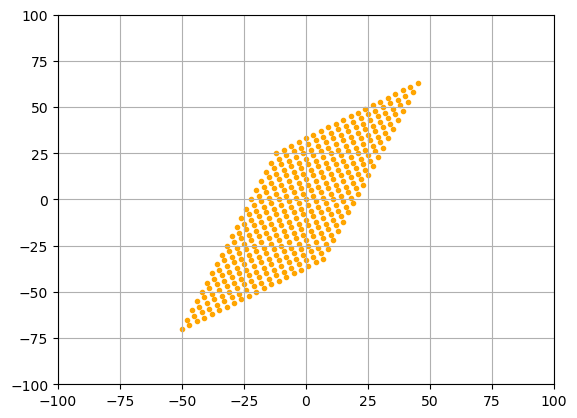

In [32]:
plotSpace(v1, v2)

### Traza

- Se defina como la suma de elements de la diagonal
- Tiene la propiedad de no cambiar ante un cambio de base Determinante
- Es un valor numérico que no da información de la transformación que produce una matriz en su espacio. En el caso de un plano nos dice como varían las áreas en el plano.
- Si una determinante es negativa nos indica que la trasformación rotó el espacio 90 grado, si fuese positiva nos indica que no rota o que rota 180 grados

In [88]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
np.trace(matrix)

15

### Determinante

- El determinante nos da información sobre la transformación que ejerce una matriz sobre el espacio que está transformando.
- El valor absoluto del determinante está relacionado con la ampliación de ese espacio al aplicar la matriz.
- El signo del determinante puede indicar que la matriz ejerce una rotación sobre los ejes.

In [91]:
np.linalg.det(matrix)

6.66133814775094e-16

## Solución de un sistema de ecuaciones lineal

$$y=3x+5$$
$$y=2x+3$$

Ambas variables se pasan al mismo lado y se tiene:

$$-3x + y =5$$
$$-2x + y =3$$

Se hace el producto con $\begin{bmatrix}
x\\ 
y
\end{bmatrix} $ para que al resolver la operacion nos dé la ecuación

$$
\begin{bmatrix}
-3 & 1\\ 
-2 & 1
\end{bmatrix} \cdot
\begin{bmatrix}
x\\ 
y
\end{bmatrix} =
\begin{bmatrix}
5\\ 
3
\end{bmatrix}$$

Recordemos

![](https://slideplayer.es/slide/5478638/17/images/5/Sistema+compatible+determinado+Sistema+compatible+indeterminado.jpg)

In [33]:
A = np.array([[-3,1],[-2,1]])
b = np.array([5,3])

In [106]:
A1 = np.array([[-7,1],[-3,1]])
b1 = np.array([2,5])

np.linalg.inv(A1).dot(b1)

array([0.75, 7.25])

In [34]:
sol =  np.linalg.inv(A).dot(b)
print(sol)

[-2. -1.]


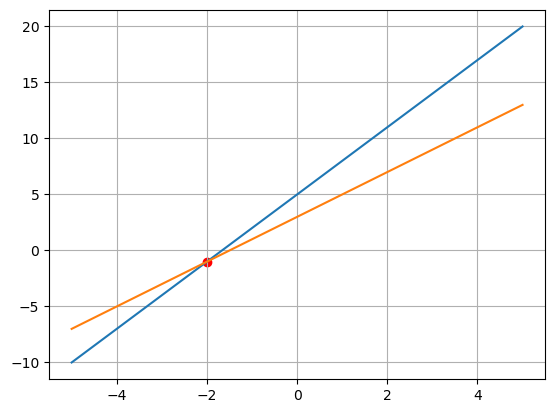

In [35]:
x = np.linspace(-5, 5, 10)
y1 = 3 * x + 5
y2 = 2 * x + 3

plt.scatter(sol[0], sol[1], c="red")
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()

## Espacios y subespacios

**Espacio euclidiano o Espacio vectoria**l es el conjunto de n-adas ordenadas, tambien conocido por espacio n-dimencional y de denota por Rn este es una sucesión de n números reales ejemplo (a1,a2,...,an) donde los vectores Rn se clasifican así:

**R1**= espacio unidimensional, línea recta real.

**R2**= espacio bidimensional, pares ordenados.

**R3**= espacio tridimensional, terna ordenadas.

**Hiperplano**: una dimension menos el espacio donde estamos trabajando

**Si trabajamos en R3 un hiperplano es R2, si trabajamos en R2 un hiperplano es la recta.**




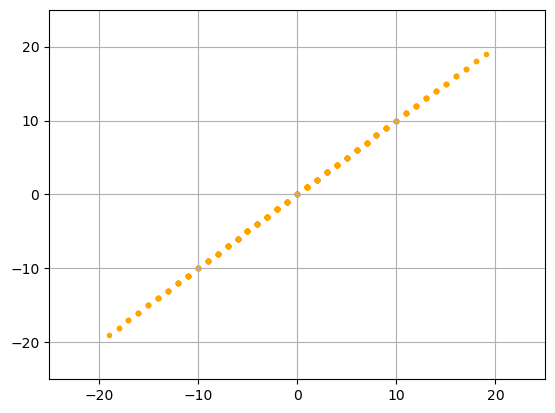

In [36]:
v1 = np.array([1, 1])
v2 = np.array([-1, -1])

plotSpace(v1, v2, lim=(-25, 25))

In [37]:
from mpl_toolkits.mplot3d import Axes3D

In [38]:
v1 = np.array([1,0,0])
v2 = np.array([2,-3,0])

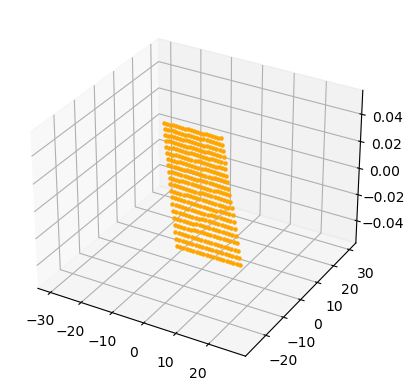

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for a in range (-10,10):
  for b in range (-10,10):
    ax.scatter(v1[0]*a+ v2[0]*b,
               v1[1]*a+ v2[1]*b,
               v1[2]*a+ v2[2]*b,
               marker='.',
               color="orange")

## Norma

La norma de un vector es la suma de las componentes cuadradas de la vector.

$$||A|| = \sqrt{a_1^2 + a_2^2 +... + a_n^2}$$

- $norma(v) \geq 0$
- $norma(v) = 0 \Leftrightarrow v = 0$
- $norma(v3) \leq norma(v1)+norma(v2)$ Siendo v3 una combinación lineal de v1 y v2
- $norma(av)=|a|*norma(v)$


Las normas se usan para determinar el modulo de regularización en la construcción de un modelo. La regularización se usa para castigar la complejidad de un modelo y evitar overfitting, las más comunes son L2 para simplicidad y L1 para esparcidad.

![](https://static.platzi.com/media/user_upload/Screenshot%20from%202020-04-13%2017-09-27-e0560414-3d1e-44b4-ae7c-5d0c0634530c.jpg)

In [40]:
import seaborn as sns

In [41]:
v1 = np.array([2, 7])
v2 = np.array([3, 5])

In [42]:
v1_v2 = v1 + v2
v1_v2

array([ 5, 12])

In [43]:
norm_v1 = np.linalg.norm(v1)
norm_v1

7.280109889280518

In [44]:
norm_v2 = np.linalg.norm(v2)
norm_v2

5.830951894845301

In [45]:
norm_v3 = np.linalg.norm(v1_v2)
norm_v3

13.0

In [46]:
norm_v3 <= norm_v1 + norm_v2

True

### Tipos de norma

In [47]:
vector = np.array([-1, 2, 0, 5, 6, 0])

#### Norma 0

$$\# v_i \neq 0$$

In [48]:
np.linalg.norm(vector, ord=0)

4.0

#### Norma 1

$$\sum_i{|v_i|}$$

In [49]:
np.linalg.norm(vector, ord=1)

14.0

#### Norma 2

$$\text{Distancia euclidiana: }\sqrt{a_1^2 + a_2^2 +... + a_n^2}$$

In [50]:
np.linalg.norm(vector, ord=2)

8.12403840463596

In [51]:
vector.T.dot(vector) # L2^2

66

#### Norma $\infty$

$$max_i{|v_i|}$$

In [52]:
np.linalg.norm(vector, ord=np.inf)

6.0

### Producto interno en función de la norma

$$v_1^t \cdot v_2 = norma_2(v_1)\cdot norma_2(v_2)\cdot cos(\theta)$$

Donde $\theta$ es el angulo entre vectores.

Se usa como metrica para medir el accuracy de un modelo de machine learning, midiendo la similitud entre el vector de los labels y el vector de nuestras predicciones.

In [53]:
v1 = np.array([0, 0, 0, 3])
v2 = np.array([0, 0, 3, 3])

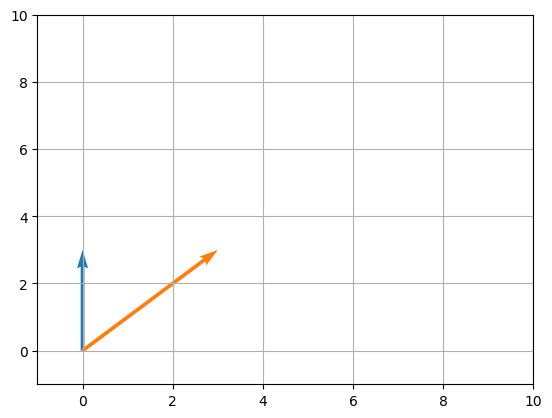

In [54]:
plt.quiver(
    [v1[0], v2[0]],
    [v1[1], v2[1]],
    [v1[2], v2[2]],
    [v1[3], v2[3]],
    angles="xy", scale_units="xy", scale=1,
    color = sns.color_palette()
)

plt.ylim(-1, 10)
plt.xlim(-1, 10)

plt.grid()

In [55]:
v1 = np.array([0, 3])
v2 = np.array([3, 3])

v1.T.dot(v2)

9

In [56]:
np.linalg.norm(v1) * np.linalg.norm(v2) * np.cos(np.deg2rad(45))

9.0